In [2]:
import urllib
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import string as st
import seaborn as sns
import scipy as sci
import json

In [7]:
def load_data(url):
    r = urllib.request.urlopen(url) 
    soup = BeautifulSoup(r)
    
    data2 = soup.find_all('tr')    
    labels = []
    for h in data2[0].find_all('th'):
        labels.append(h.get_text().strip().lower())
    
    final = []
    for data in data2[1:]:
        data_list = []
        for d in data.find_all('td'):
            d_str = d.get_text().replace(',','')
            
            if d_str.isnumeric():
                data_list.append(int(d_str))
            else:
                data_list.append(d_str)                      
        final.append(data_list)
    
    df = pd.DataFrame(final, columns = labels)    
    df['submit date'] = pd.to_datetime(df['submit date'])
    df['start date'] = pd.to_datetime(df['start date'])
    df['state'] = df['location'].str.split().str[-1] 
    df['year'] = df['submit date'].dt.year
    df['month'] = df['submit date'].dt.month
    return df

In [8]:
bs = load_data('https://h1bdata.info/index.php?em=&job=&city=NEW+YORK&year=All+Years')
bsbs = load_data('https://h1bdata.info/index.php?em=&job=&city=LOS+ANGELES&year=All+Years')
bsbs1 = load_data('https://h1bdata.info/index.php?em=&job=&city=SAN+FRANCISCO&year=All+Years')
bs4 = load_data('https://h1bdata.info/index.php?em=&job=&city=HOUSTON&year=All+Years')
bs5=load_data('https://h1bdata.info/index.php?em=&job=&city=CHICAGO&year=All+Years')

In [9]:
bs4['location']='Houston'
bs5['location']='Chicago'
bs['location']='New York'
bsbs['location']='Los Angeles'
bsbs1['location']='San Francisco'


In [10]:
base = pd.concat([bs5, bs4,bsbs1,bsbs,bs ])
base = base.replace(r'^\s*$', np.nan, regex=True)
base=base.dropna()
base=base[ base['year'] >2015 ]

In [15]:
por_año=base.groupby(['year']).count()
por_ciudad=base.groupby(['location']).count()
por_añociudad = basee.groupby(['year', 'location']).count()

In [ ]:
base.to_excel(r'a.xlsx')

In [25]:
por_añociudad = base.groupby(['year', 'location']).count()

In [ ]:
año_empleador= base.groupby(['year', 'employer']).count()
empleador_ciuda= base.groupby(['location', 'employer']).count()

In [29]:
base6=base[ base['year']==2016 ]
base7=base[ base['year']==2017 ]
base8=base[ base['year']==2018 ]
base9=base[ base['year']==2019 ]
base0=base[ base['year']==2020 ]

In [30]:
año_empleador6= base6.groupby(['year', 'employer']).count()
año_empleador7= base7.groupby(['year', 'employer']).count()
año_empleador8= base8.groupby(['year', 'employer']).count()
año_empleador9= base9.groupby(['year', 'employer']).count()
año_empleador0= base0.groupby(['year', 'employer']).count()


In [34]:
año_empleador6=año_empleador6.sort_values(by=['job title'])
año_empleador7=año_empleador7.sort_values(by=['job title'])
año_empleador8=año_empleador8.sort_values(by=['job title'])
año_empleador9=año_empleador9.sort_values(by=['job title'])
año_empleador0=año_empleador0.sort_values(by=['job title'])


In [41]:
año_empleador6.tail()

job title  base salary  location  \
year employer                                                              
2016 INFOSYS LIMITED                          783          783       783   
     DELOITTE CONSULTING LLP                  806          806       806   
     TATA CONSULTANCY SERVICES LIMITED        865          865       865   
     CAPGEMINI AMERICA INC                   1071         1071      1071   
     ERNST & YOUNG US LLP                    2143         2143      2143   

                                        submit date  start date  case status  \
year employer                                                                  
2016 INFOSYS LIMITED                            783         783          783   
     DELOITTE CONSULTING LLP                    806         806          806   
     TATA CONSULTANCY SERVICES LIMITED          865         865          865   
     CAPGEMINI AMERICA INC                     1071        1071         1071   
     ERNST & YOUNG US LLP                      2143        2143         2143   

                                        state  month  
year employer                                         
2016 INFOSYS LIMITED                      783    783  
     DELOITTE CONSULTING LLP              806    806  
     TATA CONSULTANCY SERVICES LIMITED    865    865  
     CAPGEMINI AMERICA INC               1071   1071  
     ERNST & YOUNG US LLP                2143   2143

In [42]:
año_empleador7.tail()

job title  base salary  \
year employer                                                               
2017 DELOITTE & TOUCHE LLP                               653          653   
     PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC        721          721   
     DELOITTE CONSULTING LLP                             796          796   
     TATA CONSULTANCY SERVICES LIMITED                   800          800   
     ERNST & YOUNG US LLP                               2723         2723   

                                                   location  submit date  \
year employer                                                              
2017 DELOITTE & TOUCHE LLP                              653          653   
     PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC       721          721   
     DELOITTE CONSULTING LLP                            796          796   
     TATA CONSULTANCY SERVICES LIMITED                  800          800   
     ERNST & YOUNG US LLP                              2723         2723   

                                                   start date  case status  \
year employer                                                                
2017 DELOITTE & TOUCHE LLP                                653          653   
     PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC         721          721   
     DELOITTE CONSULTING LLP                              796          796   
     TATA CONSULTANCY SERVICES LIMITED                    800          800   
     ERNST & YOUNG US LLP                                2723         2723   

                                                   state  month  
year employer                                                    
2017 DELOITTE & TOUCHE LLP                           653    653  
     PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC    721    721  
     DELOITTE CONSULTING LLP                         796    796  
     TATA CONSULTANCY SERVICES LIMITED               800    800  
     ERNST & YOUNG US LLP                           2723   2723

In [43]:
año_empleador8.tail()

job title  base salary  \
year employer                                                               
2018 TATA CONSULTANCY SERVICES LIMITED                   662          662   
     PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC        714          714   
     DELOITTE & TOUCHE LLP                               715          715   
     ERNST & YOUNG US LLP                               1153         1153   
     DELOITTE CONSULTING LLP                            1865         1865   

                                                   location  submit date  \
year employer                                                              
2018 TATA CONSULTANCY SERVICES LIMITED                  662          662   
     PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC       714          714   
     DELOITTE & TOUCHE LLP                              715          715   
     ERNST & YOUNG US LLP                              1153         1153   
     DELOITTE CONSULTING LLP                           1865         1865   

                                                   start date  case status  \
year employer                                                                
2018 TATA CONSULTANCY SERVICES LIMITED                    662          662   
     PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC         714          714   
     DELOITTE & TOUCHE LLP                                715          715   
     ERNST & YOUNG US LLP                                1153         1153   
     DELOITTE CONSULTING LLP                             1865         1865   

                                                   state  month  
year employer                                                    
2018 TATA CONSULTANCY SERVICES LIMITED               662    662  
     PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC    714    714  
     DELOITTE & TOUCHE LLP                           715    715  
     ERNST & YOUNG US LLP                           1153   1153  
     DELOITTE CONSULTING LLP                        1865   1865

In [44]:
año_empleador9.tail()

job title  base salary  location  \
year employer                                                                   
2019 CAPGEMINI AMERICA INC                         666          666       666   
     INFOSYS LIMITED                               675          675       675   
     DELOITTE CONSULTING LLP                       968          968       968   
     COGNIZANT TECHNOLOGY SOLUTIONS US CORP       1019         1019      1019   
     ERNST & YOUNG US LLP                         1886         1886      1886   

                                             submit date  start date  \
year employer                                                          
2019 CAPGEMINI AMERICA INC                           666         666   
     INFOSYS LIMITED                                 675         675   
     DELOITTE CONSULTING LLP                         968         968   
     COGNIZANT TECHNOLOGY SOLUTIONS US CORP         1019        1019   
     ERNST & YOUNG US LLP                           1886        1886   

                                             case status  state  month  
year employer                                                           
2019 CAPGEMINI AMERICA INC                           666    666    666  
     INFOSYS LIMITED                                 675    675    675  
     DELOITTE CONSULTING LLP                         968    968    968  
     COGNIZANT TECHNOLOGY SOLUTIONS US CORP         1019   1019   1019  
     ERNST & YOUNG US LLP                           1886   1886   1886

In [45]:
año_empleador0.tail()

job title  base salary  location  \
year employer                                                                   
2020 COGNIZANT TECHNOLOGY SOLUTIONS US CORP        385          385       385   
     DELOITTE & TOUCHE LLP                         419          419       419   
     TATA CONSULTANCY SERVICES LIMITED             431          431       431   
     DELOITTE CONSULTING LLP                       621          621       621   
     ERNST & YOUNG US LLP                         1191         1191      1191   

                                             submit date  start date  \
year employer                                                          
2020 COGNIZANT TECHNOLOGY SOLUTIONS US CORP          385         385   
     DELOITTE & TOUCHE LLP                           419         419   
     TATA CONSULTANCY SERVICES LIMITED               431         431   
     DELOITTE CONSULTING LLP                         621         621   
     ERNST & YOUNG US LLP                           1191        1191   

                                             case status  state  month  
year employer                                                           
2020 COGNIZANT TECHNOLOGY SOLUTIONS US CORP          385    385    385  
     DELOITTE & TOUCHE LLP                           419    419    419  
     TATA CONSULTANCY SERVICES LIMITED               431    431    431  
     DELOITTE CONSULTING LLP                         621    621    621  
     ERNST & YOUNG US LLP                           1191   1191   1191

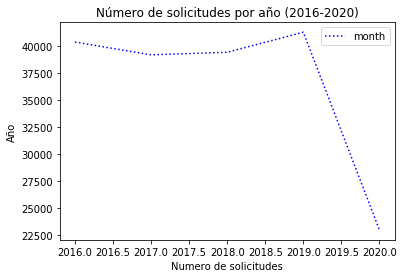

In [18]:
fig = plt.figure()
ax = plt.axes()
plt.plot( por_año.index,por_año.month,':b')

plt.legend()

plt.title('Número de solicitudes por año (2016-2020)')
plt.xlabel("Numero de solicitudes")
plt.ylabel("Año");

<BarContainer object of 5 artists>

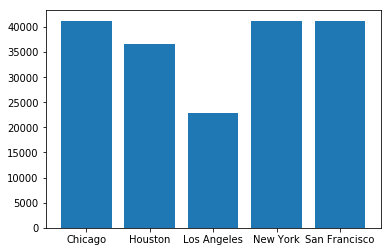

In [19]:
plt.bar(por_ciudad.index, por_ciudad.month)


In [4]:
# Organización de la base de datos
bs_york = bs[ bs['year'] ==2020 ]
bs_york = bs_york[ bs_york['location'] == "New York" ]
bs_bla = bs_york.groupby('employer').agg({'base salary': ['std', 'count', 'mean']})
df = bs_bla['base salary']
df['std_2'] = df['std'].fillna(df['std'].mean())
df['std'] = df['std'].fillna(10**-13)

/Users/juliangutierrez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/juliangutierrez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [5]:
# Define likelihood function
def normal_v(params):
    m, t = params[0], params[1]
    v = df['mean']
    negLL = -np.sum(sci.stats.norm.logpdf(v, loc=m, scale=t))
    return(negLL)

In [6]:
# Optimizamos la función de verosimilitud
guess = np.array([0,1])
estimadores = sci.optimize.fmin(normal_v, guess)

Optimization terminated successfully.
         Current function value: 14539.020976
         Iterations: 168
         Function evaluations: 331


In [7]:
# Estos son miu y tau estiamdos de la distribución prior
estimadores

array([101962.20271479,  44668.20603005])

In [8]:
# Cálculo del estimador Bayesiano desviación estandar igual a 0
df['eb estimator'] = ((df['count']/df['std']**2)/((df['count']/df['std']**2) + (1/estimadores[1]**2)))*df['mean'] + ((1/estimadores[1]**2)/((df['count']/df['std']**2) + (1/estimadores[1]**2)))*estimadores[0]

/Users/juliangutierrez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
# Cálculo del estimador Bayesiano desviación estandar igual al maximo de las desviaciones
df['eb estimator 2'] = ((df['count']/df['std_2']**2)/((df['count']/df['std_2']**2) + (1/estimadores[1]**2)))*df['mean'] + ((1/estimadores[1]**2)/((df['count']/df['std_2']**2) + (1/estimadores[1]**2)))*estimadores[0]

/Users/juliangutierrez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df['total mean'] = df['mean'].mean()
df_sub = df.loc[np.random.choice(df.index, 15, replace=False)]

/Users/juliangutierrez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_sub_t_1 = df_sub[['mean', 'eb estimator', 'total mean']].T
df_sub_t_2 = df_sub[['mean', 'eb estimator 2', 'total mean']].T

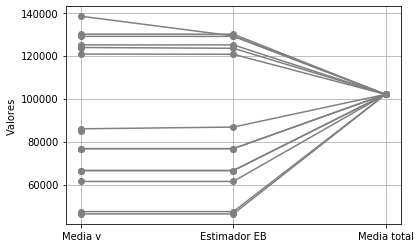

In [12]:
# Gráfica se shrink
x = np.array([0,1,2])
my_xticks = np.array(['Media v', 'Estimador EB', 'Media total'])
plt.xticks(x, my_xticks)

for i in range(0,15):
  plt.plot(x, np.array(df_sub_t_1.iloc[:,i]), marker='o', color='grey')
plt.ylabel('Valores')
plt.grid(True)

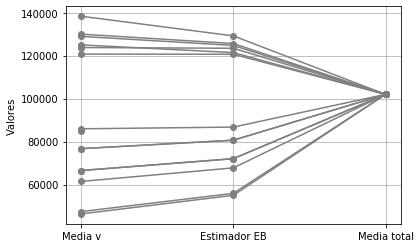

In [13]:
# Gráfica se shrink
x = np.array([0,1,2])
my_xticks = np.array(['Media v', 'Estimador EB', 'Media total'])
plt.xticks(x, my_xticks)

for i in range(0,15):
  plt.plot(x, np.array(df_sub_t_2.iloc[:,i]), marker='o', color='grey')
plt.ylabel('Valores')
plt.grid(True)

In [3]:
bs.head()

,Unnamed: 0,employer,job title,base salary,location,submit date,start date,case status,state,year,month,numero
0,2,CSC COVANSYS CORPORATION,&NBSP;PROFESSIONAL: PRODUCT TEST&NBSP;,74818,Chicago,2017-07-07,2017-07-10,CERTIFIED,IL,2017,7,1
1,3,CSC COVANSYS CORPORATION,&NBSP;PROFESSIONAL: QUALITY&NBSP;,74818,Chicago,2017-07-07,2017-07-10,CERTIFIED,IL,2017,7,1
2,4,AMG TECHNOLOGY,'BUSINESS ANALYST,53820,Chicago,2020-06-10,2020-10-01,CERTIFIED,ILLINOIS,2020,6,1
3,5,ETEST IT INC,NET DEVELOPER,69000,Chicago,2015-09-01,2015-09-22,CERTIFIED,IL,2015,9,1
4,6,SKILLFUL TECHNOLOGIES INC,. NET DEVELOPER,95000,Chicago,2020-02-27,2020-03-25,CERTIFIED,ILLINOIS,2020,2,1


In [4]:
bs['employer'].nunique()

26492

In [6]:
bs['location'].unique()

array(['Chicago', 'Houston', 'San Francisco', 'Los Angeles', 'New York'],
      dtype=object)

In [5]:
bs.groupby('location')['base salary'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Chicago,49998.0,88445.349974,65777.969852,450.0,65000.0,80000.0,100000.0,11000000.0
Houston,49993.0,85971.124077,40610.175568,600.0,63000.0,77273.0,98821.0,1308000.0
Los Angeles,28325.0,87300.893769,43778.936260,603.0,60000.0,77200.0,102206.0,1200000.0
New York,49991.0,102282.847413,45685.182501,310.0,71700.0,92500.0,125000.0,1600000.0
San Francisco,49996.0,111920.138111,45734.450467,1777.0,80000.0,105000.0,135000.0,1826000.0


In [6]:
bs['base salary'].describe()

count    2.283030e+05
mean     9.593226e+04
std      5.069068e+04
min      3.100000e+02
25%      6.700000e+04
50%      8.550000e+04
75%      1.150000e+05
max      1.100000e+07
Name: base salary, dtype: float64